In [27]:
#import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np 
from datetime import datetime
import random

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [28]:
#call in csv file and set up API keys
microplastics_csv = pd.read_csv("Resources/MarinePlastics.csv")
microplastics_csv

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,35217,4/6/2005 12:00:00 AM,2.1900,-135.7300,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6d278226-565e-4ed0-b46a-e1cabb32ecc0,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.510939e+07,2.438491e+05
1,36142,2/24/2002 12:00:00 AM,-12.6900,-142.3000,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6fb35a58-21b6-4cce-9dbb-f9c222bc311d,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.584076e+07,-1.424337e+06
2,35881,10/25/2010 12:00:00 AM,19.6200,-146.5000,Pacific Ocean,NaN,NaN,0.00216,pieces/m3,0.0005-0.005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,67f360ab-017e-4a86-931b-6f7336c2c206,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.630831e+07,2.228069e+06
3,36474,11/16/2003 12:00:00 AM,18.9700,-143.4700,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,5be50d3b-7343-45f0-ac71-19a3cdc047ea,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.597101e+07,2.151404e+06
4,34553,3/5/2001 12:00:00 AM,19.3800,-74.0900,Atlantic Ocean,Caribbean Sea,NaN,0.00000,pieces/m3,0-0.0005,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,5e54fac6-640b-4445-8fff-94a9498d6168,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-8.247661e+06,2.199726e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11301,37329,11/28/2014 12:00:00 AM,15.5034,-52.4550,Atlantic Ocean,NaN,NaN,0.00200,pieces/m3,0.0005-0.005,...,211009,https://www.ncei.noaa.gov/access/metadata/land...,6084e526-1912-4ee3-95ae-de0f245d6ac8,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",-5.839264e+06,1.747284e+06
11302,36788,12/11/2014 12:00:00 AM,15.3929,-57.7041,Atlantic Ocean,NaN,NaN,0.02500,pieces/m3,0.005-1,...,211009,https://www.ncei.noaa.gov/access/metadata/land...,40034069-71ef-4b88-b504-6aa74d855dd3,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2...",-6.423591e+06,1.734522e+06
11303,29706,11/7/1995 12:00:00 AM,17.3500,-60.2000,Atlantic Ocean,NaN,NaN,0.00864,pieces/m3,0.005-1,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,791c578c-b672-4e4b-a885-0c3fdce11f8d,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-6.701433e+06,1.961605e+06
11304,32460,10/31/2001 12:00:00 AM,18.6300,-59.6400,Atlantic Ocean,NaN,NaN,0.01080,pieces/m3,0.005-1,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,46335627-8df0-400e-bef8-7ff0afed6798,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-6.639094e+06,2.111422e+06


In [29]:
#taking columns we need + Adding Regions and Sampling Method - Latitude,Longitude (Alishon)
clean_microplastics = microplastics_csv[["Date", "Oceans","Regions","Measurement","Unit","Sampling Method"]]
clean_microplastics.head()

,Date,Oceans,Regions,Measurement,Unit,Sampling Method
0,4/6/2005 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
1,2/24/2002 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
2,10/25/2010 12:00:00 AM,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net
3,11/16/2003 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net
4,3/5/2001 12:00:00 AM,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net


In [30]:
clean_microplastics["Year"] = pd.Series()
clean_microplastics.head()

,Date,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
1,2/24/2002 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
2,10/25/2010 12:00:00 AM,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,NaN
3,11/16/2003 12:00:00 AM,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
4,3/5/2001 12:00:00 AM,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,NaN


In [31]:
#cleaning time column
for i in range(len(clean_microplastics["Date"])):
    date_time = clean_microplastics.loc[i,"Date"]
    date = date_time.split(" ")[0]
    clean_microplastics.loc[i,"Date"]=date
clean_microplastics.head()

,Date,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
1,2/24/2002,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
2,10/25/2010,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,NaN
3,11/16/2003,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,NaN
4,3/5/2001,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,NaN


In [32]:
for x in range(len(clean_microplastics["Year"])):
    year_time = clean_microplastics.loc[x,"Date"]
    year = year_time.split("/")[2]
    clean_microplastics.loc[x,"Year"]=year
clean_microplastics

,Date,Oceans,Regions,Measurement,Unit,Sampling Method,Year
0,4/6/2005,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2005
1,2/24/2002,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2002
2,10/25/2010,Pacific Ocean,NaN,0.00216,pieces/m3,Neuston net,2010
3,11/16/2003,Pacific Ocean,NaN,0.00000,pieces/m3,Neuston net,2003
4,3/5/2001,Atlantic Ocean,Caribbean Sea,0.00000,pieces/m3,Neuston net,2001
...,...,...,...,...,...,...,...
11301,11/28/2014,Atlantic Ocean,NaN,0.00200,pieces/m3,Grab sample,2014
11302,12/11/2014,Atlantic Ocean,NaN,0.02500,pieces/m3,Grab sample,2014
11303,11/7/1995,Atlantic Ocean,NaN,0.00864,pieces/m3,Neuston net,1995
11304,10/31/2001,Atlantic Ocean,NaN,0.01080,pieces/m3,Neuston net,2001


In [33]:
# Sort years in in ascending order
sorted_df = clean_microplastics.sort_values(by="Year")

# Filter years so all samples are according sampling in California's Seas
filtered_df = sorted_df[pd.to_datetime(sorted_df["Date"]).dt.year.isin([2014, 2015, 2016])]

In [34]:
# Calculate the microplastics mean for Atlantic Ocean
atlantic_df = filtered_df[(filtered_df["Oceans"] == "Atlantic Ocean")]
atlantic_mean = atlantic_df["Measurement"].mean()
atlantic_mean

0.02652752398989899

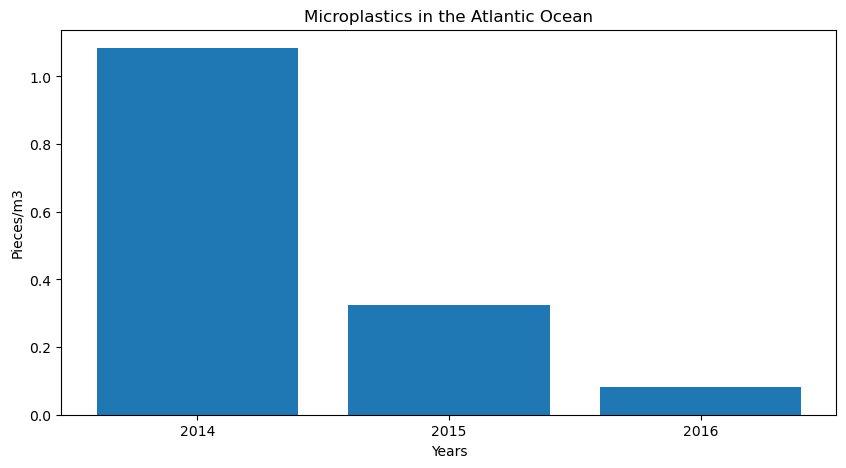

<Figure size 1000x500 with 0 Axes>

In [43]:
# Create Barplot
plt.bar(atlantic_df["Year"], atlantic_df["Measurement"])
plt.title("Microplastics in the Atlantic Ocean")
plt.xlabel("Years")
plt.ylabel("Pieces/m3")
plt.show()

# Save figure
plt.savefig("output_data/Microplastics in the Atlantic Ocean.png")

In [35]:
# Calculate the microplastics mean for Pacfic Ocean
pacific_df = filtered_df[(filtered_df["Oceans"] == "Pacific Ocean")]
pacific_mean = pacific_df["Measurement"].mean()
pacific_mean

1.9579067935174073

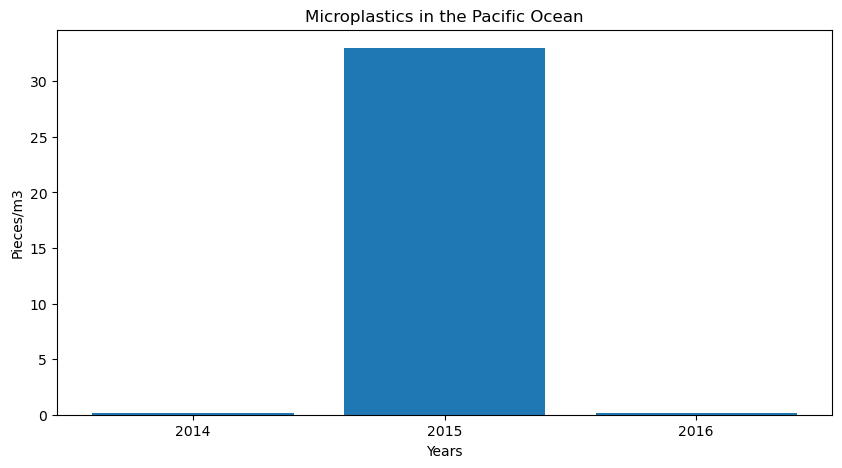

<Figure size 1000x500 with 0 Axes>

In [44]:
# Create Barplot
plt.bar(pacific_df["Year"], pacific_df["Measurement"])
plt.title("Microplastics in the Pacific Ocean")
plt.xlabel("Years")
plt.ylabel("Pieces/m3")
plt.show()

# Save figure
plt.savefig("output_data/Microplastics in the Pacific Ocean.png")

In [37]:
def gendata(loc1=0, loc2=0):
    sample_size = 50  # set the sample size
    atlantic_sample = atlantic_df["Measurement"].sample(n=sample_size, random_state=42)
    pacific_sample = pacific_df["Measurement"].sample(n=sample_size, random_state=42)
    
    # Create a scatter plot of data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(atlantic_sample)), atlantic_sample, label="Atlantic Ocean")
    plt.scatter(range(len(pacific_sample)), pacific_sample, label="Pacific Ocean")
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.title('Ocean Measurements')
    plt.legend()
    
    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(atlantic_sample, 5, density=True, alpha=0.7, label="Atlantic Ocean")
    plt.hist(pacific_sample, 5, density=True, alpha=0.7, label="Pacific Ocean")
    plt.axvline(atlantic_sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(pacific_sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return atlantic_sample, pacific_sample

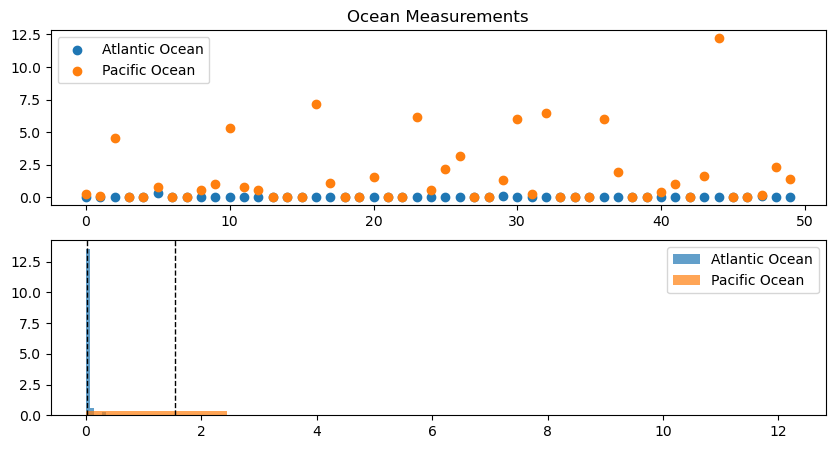

In [45]:
# Generate some data and show the scatter plot
atlantic_sample, pacific_sample = gendata()

# Save figure
plt.savefig("output_data/sample_oceans.png")

In [47]:
# Run the t-test on the two microplastics measurement samples. 
stats.ttest_ind(atlantic_sample, pacific_sample, equal_var=False)

Ttest_indResult(statistic=-4.214879675857894, pvalue=0.00010690516473237953)